<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/lab4_in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Библиотеки

In [238]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Данные

In [239]:
vmax=0.11
tm=20
dt=0.05
d1=0.033
l1=0.075
l2=0.155
l3=0.135
l4=0.2176

In [240]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [241]:
data3_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_in.txt", sep=' ', names=['f2', 'f3', 'f4'], index_col = False)
data3_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_out.txt", sep=' ', names=['A1', 'A2', 'A3', 'A4', 'A5'], index_col = False)

In [242]:
data3_ideal.head()

,f2,f3,f4
0,-0.944265,2.127559,-0.612497
1,-0.938988,2.127583,-0.617798
2,-0.933694,2.127559,-0.623069
3,-0.928389,2.127504,-0.628318
4,-0.923074,2.127417,-0.633547


In [243]:
data3_real.head()

,A1,A2,A3,A4,A5
0,2.949583,0.190238,-0.437844,1.216504,2.93
1,2.949583,0.190238,-0.437844,1.216504,2.93
2,2.949573,0.190268,-0.437828,1.216283,2.93
3,2.949573,0.190711,-0.437828,1.213141,2.93
4,2.949573,0.194154,-0.437844,1.204690,2.93


In [244]:
def A_to_f(data):
  data['f1'] = 2.9496 - data['A1']
  data['f2'] = data['A2'] - 1.1345
  data['f3'] = data['A3'] + 2.5654
  data['f4'] = data['A4'] - 1.8290
  data['f5'] = 2.930 - data['A5']
  return data

In [245]:
data3_real = A_to_f(data3_real)
data3_real.head()

,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
2,2.949573,0.190268,-0.437828,1.216283,2.93,0.000027,-0.944232,2.127572,-0.612717,1.700000e-07
3,2.949573,0.190711,-0.437828,1.213141,2.93,0.000027,-0.943789,2.127572,-0.615859,1.700000e-07
4,2.949573,0.194154,-0.437844,1.204690,2.93,0.000027,-0.940346,2.127556,-0.624310,1.700000e-07


In [246]:
t = 0
t_list = []
for i in range(len(data3_real)):
  t_list.append(t)
  t += dt
data3_real['t'] = t_list
t -= dt
print(round(t, 12), 'c')
data3_real.head()

20.0 c


,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5,t
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.00
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.05
2,2.949573,0.190268,-0.437828,1.216283,2.93,0.000027,-0.944232,2.127572,-0.612717,1.700000e-07,0.10
3,2.949573,0.190711,-0.437828,1.213141,2.93,0.000027,-0.943789,2.127572,-0.615859,1.700000e-07,0.15
4,2.949573,0.194154,-0.437844,1.204690,2.93,0.000027,-0.940346,2.127556,-0.624310,1.700000e-07,0.20


In [247]:
t = 0
t_list = []
for i in range(len(data3_ideal)):
  t_list.append(t)
  t += dt
data3_ideal['t'] = t_list
t -= dt
print(round(t, 12), 'c')
data3_ideal.head()

20.0 c


,f2,f3,f4,t
0,-0.944265,2.127559,-0.612497,0.00
1,-0.938988,2.127583,-0.617798,0.05
2,-0.933694,2.127559,-0.623069,0.10
3,-0.928389,2.127504,-0.628318,0.15
4,-0.923074,2.127417,-0.633547,0.20


In [248]:
def x_z_theta(f2, f3, f4):
  xA = d1 + l2*np.sin(f2) + l3*np.sin(f2 + f3) + l4*np.sin(f2 + f3 + f4)
  zA = l1 + l2*np.cos(f2) + l3*np.cos(f2 + f3) + l4*np.cos(f2 + f3 + f4)
  theta = f2 + f3 + f4 - np.pi/2
  return xA, zA, theta

In [249]:
xA_i, zA_i, theta_i = x_z_theta(data3_ideal['f2'].values, data3_ideal['f3'].values, data3_ideal['f4'].values)
xA_r, zA_r, theta_r = x_z_theta(data3_real['f2'].values, data3_real['f3'].values, data3_real['f4'].values)
data3_ideal['xA'], data3_ideal['zA'], data3_ideal['theta'] = xA_i, zA_i, theta_i
data3_real['xA'], data3_real['zA'], data3_real['theta'] = xA_r, zA_r, theta_r

In [250]:
def dfun(x):
  x = np.array(x)
  v = list((x[1:] - x[:-1])/dt) + [0]
  return v

In [251]:
vxA_i, vzA_i, vtheta_i = dfun(xA_i), dfun(zA_i), dfun(theta_i)
vxA_r, vzA_r, vtheta_r = dfun(xA_r), dfun(zA_r), dfun(theta_r)
data3_ideal['vxA'], data3_ideal['vzA'], data3_ideal['vtheta'] = vxA_i, vzA_i, vtheta_i
data3_real['vxA'], data3_real['vzA'], data3_real['vtheta'] = vxA_r, vzA_r, vtheta_r

In [252]:
data3_ideal.head()

,f2,f3,f4,t,xA,zA,theta,vxA,vzA,vtheta
0,-0.944265,2.127559,-0.612497,0.00,0.15000,0.400000,-1.0,0.015,-3.964127e-05,6.661338e-15
1,-0.938988,2.127583,-0.617798,0.05,0.15075,0.399998,-1.0,0.015,-3.046863e-09,-6.661338e-15
2,-0.933694,2.127559,-0.623069,0.10,0.15150,0.399998,-1.0,0.015,6.795886e-10,-4.440892e-15
3,-0.928389,2.127504,-0.628318,0.15,0.15225,0.399998,-1.0,0.015,-1.061408e-09,1.332268e-14
4,-0.923074,2.127417,-0.633547,0.20,0.15300,0.399998,-1.0,0.015,-1.681294e-09,-1.332268e-14


In [253]:
data3_real.head()

,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5,t,xA,zA,theta,vxA,vzA,vtheta
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.00,0.150001,0.400000,-0.999998,0.000000,0.000000,0.000000
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.05,0.150001,0.400000,-0.999998,-0.000540,0.000373,-0.003507
2,2.949573,0.190268,-0.437828,1.216283,2.93,0.000027,-0.944232,2.127572,-0.612717,1.700000e-07,0.10,0.149974,0.400019,-1.000174,-0.008635,0.006335,-0.053972
3,2.949573,0.190711,-0.437828,1.213141,2.93,0.000027,-0.943789,2.127572,-0.615859,1.700000e-07,0.15,0.149542,0.400336,-1.002872,-0.008702,0.011769,-0.100465
4,2.949573,0.194154,-0.437844,1.204690,2.93,0.000027,-0.940346,2.127556,-0.624310,1.700000e-07,0.20,0.149107,0.400924,-1.007895,0.010490,0.005255,-0.045520


In [254]:
data3_diff = data3_real[['f2', 'f3', 'f4', 'xA', 'zA', 'theta', 'vxA', 'vzA', 'vtheta']] - data3_ideal[['f2', 'f3', 'f4', 'xA', 'zA', 'theta', 'vxA', 'vzA', 'vtheta']]
data3_diff['t'] = data3_real['t']
data3_diff.head()

,f2,f3,f4,xA,zA,theta,vxA,vzA,vtheta,t
0,0.000003,-0.000002,0.000001,5.949694e-07,9.188724e-08,0.000002,-0.015000,0.000040,-6.661338e-15,0.00
1,-0.005274,-0.000026,0.005302,-7.493936e-04,2.073951e-06,0.000002,-0.015541,0.000373,-3.507000e-03,0.05
2,-0.010538,0.000013,0.010352,-1.526437e-03,2.074071e-05,-0.000174,-0.023635,0.006335,-5.397200e-02,0.10
3,-0.015400,0.000068,0.012460,-2.708190e-03,3.374977e-04,-0.002872,-0.023702,0.011769,-1.004650e-01,0.15
4,-0.017272,0.000139,0.009237,-3.893295e-03,9.259717e-04,-0.007895,-0.004510,0.005255,-4.552000e-02,0.20


### Формируем управление

In [255]:
def get_J(fi2, fi3, fi4):
  J = np.array([[l2*np.cos(fi2)+l3*np.cos(fi2+fi3)+l4*np.cos(fi2+fi3+fi4),
               l3*np.cos(fi2+fi3)+l4*np.cos(fi2+fi3+fi4),
               l4*np.cos(fi2+fi3+fi4)],
              [-l2*np.sin(fi2)-l3*np.sin(fi2+fi3)-l4*np.sin(fi2+fi3+fi4),
               -l3*np.sin(fi2+fi3)-l4*np.sin(fi2+fi3+fi4),
               -l4*np.sin(fi2+fi3+fi4)],
              [1,1,1]])
  return J

In [256]:
x_0 = 0.15
x_t2 = 0.3
z_0 = 0.4
z_t2 = 0.4
theta = -1
tm = 20
eps = 0.0001
n = int((tm/2)/dt)
x = [x_0]
z = [z_0]
x_v = [x_0-d1-l4*np.cos(theta)]
z_v = [z_0-l1+l4*np.sin(theta)]
"""
for i in range(1, n+1):
  x.append(x[i-1]+(x_t2-x_0)/n)
  z.append(z[i-1]+(z_t2-z_0)/n)
  x_v.append(x[i]-d1-l4*np.cos(theta))
  z_v.append(z[i]-l1+l4*np.sin(theta))
"""

'\nfor i in range(1, n+1):\n  x.append(x[i-1]+(x_t2-x_0)/n)\n  z.append(z[i-1]+(z_t2-z_0)/n)\n  x_v.append(x[i]-d1-l4*np.cos(theta))\n  z_v.append(z[i]-l1+l4*np.sin(theta))\n'

In [257]:
len(data3_ideal)

401

In [258]:
fi2 = [0 for i in range(n+1)]
fi3 = [0 for i in range(n+1)]
fi4 = [0 for i in range(n+1)]
vX_s = [0 for i in range(n+1)]
vZ_s = [0 for i in range(n+1)]
vtheta_s = [0 for i in range(n+1)]
X_s = [0 for i in range(n+1)]
Z_s = [0 for i in range(n+1)]
theta_s = [0 for i in range(n+1)]
X_s[0] = x_0
Z_s[0] = z_0
theta_s[0] = theta

In [259]:
fi3[0] = np.arccos((x_v[0]**2+z_v[0]**2-l2**2-l3**2)/(2*l2*l3))
fi2[0] = np.arctan2(l2+l3*np.cos(fi3[0]), l3*np.sin(fi3[0]))-np.arctan2(z_v[0],x_v[0])
fi4[0] = theta-fi2[0]-fi3[0]+np.pi/2

In [260]:
k = 0.05
ex = 0
ez = 0
etheta = 0
for i in range(n):
  vX_s[i] = data3_ideal['vxA'][i] - k*ex
  vZ_s[i] = data3_ideal['vzA'][i] - k*ez
  vtheta_s[i] = data3_ideal['vtheta'][i] - k*etheta
  J = get_J(fi2[i], fi3[i], fi4[i])
  vb = [vX_s[i], vZ_s[i], vtheta_s[i]]
  vq = np.linalg.solve(J, vb)
  fi2[i+1] = fi2[i] + vq[0]*dt
  fi3[i+1] = fi3[i] + vq[1]*dt
  fi4[i+1] = fi4[i] + vq[2]*dt
  X_s[i+1] = d1+l2*np.sin(fi2[i+1])+l3*np.sin(fi2[i+1]+fi3[i+1])+l4*np.sin(fi2[i+1]+fi3[i+1]+fi4[i+1])
  Z_s[i+1] = l1+l2*np.cos(fi2[i+1])+l3*np.cos(fi2[i+1]+fi3[i+1])+l4*np.cos(fi2[i+1]+fi3[i+1]+fi4[i+1])
  theta_s[i+1] = fi2[i+1] + fi3[i+1] + fi4[i+1] - np.pi/2
  ex = data3_ideal['xA'][i+1] - X_s[i+1] + data3_diff['xA'][i+1]
  ez = data3_ideal['zA'][i+1] - Z_s[i+1] + data3_diff['zA'][i+1]
  etheta = data3_ideal['theta'][i+1] - theta_s[i+1] + data3_diff['theta'][i+1]

In [261]:
def itegr(v, x0):
  x_sum = x0
  x = []
  for vi in v:
    x.append(x_sum)
    x_sum += vi*dt
  return x

In [262]:
fi2 = np.concatenate((fi2[:-1], fi2[::-1]))
fi3 = np.concatenate((fi3[:-1], fi3[::-1]))
fi4 = np.concatenate((fi4[:-1], fi4[::-1]))
"""X_s = itegr(vX_s, x_0)
Z_s = itegr(vZ_s, z_0)
theta_s = itegr(vtheta_s, theta)"""
X_s = np.concatenate((X_s[:-1], X_s[::-1]))
Z_s = np.concatenate((Z_s[:-1], Z_s[::-1]))
theta_s = np.concatenate((theta_s[:-1], theta_s[::-1]))

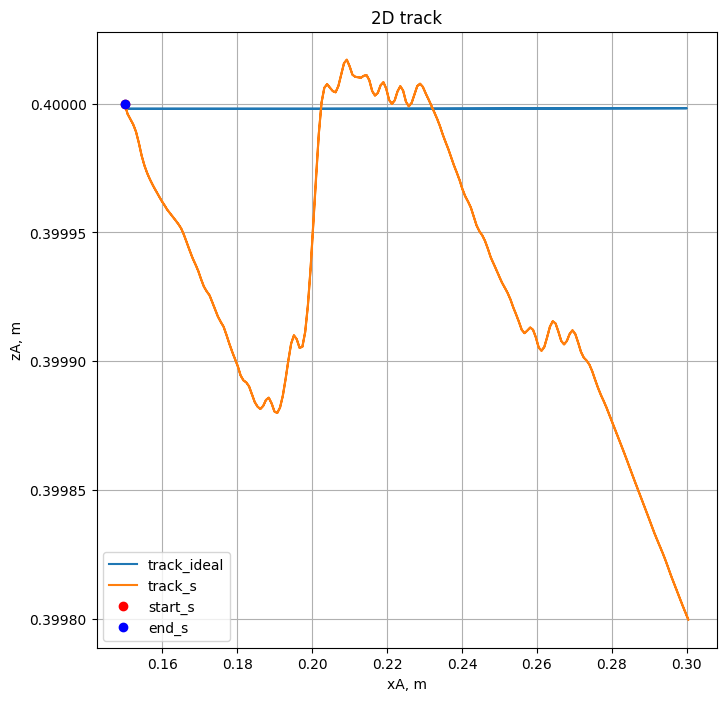

In [263]:
plt.figure(figsize=(8, 8))
plt.plot(data3_ideal['xA'], data3_ideal['zA'], label='track_ideal')
plt.plot(X_s, Z_s, label='track_s')
plt.plot(X_s[0], Z_s[0], 'ro', label='start_s')
plt.plot(X_s[-1], Z_s[-1], 'bo', label='end_s')
#plt.ylim(z[0] - eps, z[0] + eps)
plt.title('2D track')
plt.xlabel('xA, m')
plt.ylabel('zA, m')
plt.legend()
plt.grid()
plt.show()